<h1>MRI IMAGE FOR BRAIN TUMOR CLASSIFICATION USING VGG19 and Fine Tuned DENSE LAYER<h1>

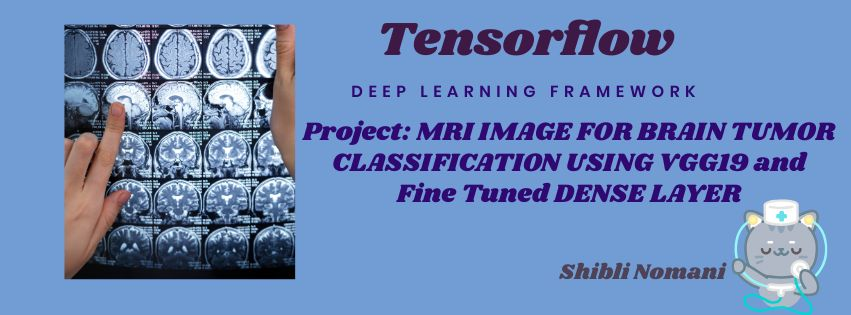

# 😉 About Dataset

What is an MRI Image?
MRI (Magnetic Resonance Imaging) produces detailed images of the brain's internal structures using magnetic fields and radio waves.

**Importance of Brain Tumor Classification**
Analyzing MRI images helps categorize different brain tumors, aiding in:

1. Early detection and diagnosis.

2. Tailoring effective treatment plans.

3. Monitoring tumor progression.

**Dataset Details**
Training Dataset: **`[TREAT AS TRAINING IMAGE DATA FOR MODEL TRAINING]`**
* Glioma: 1321 files
* Meningioma: 1339 files
* No Tumor: 1595 files
* Pituitary: 1457 files

Testing Dataset: **`[TREAT AS VALIDATION IMAGE DATA DURING MODEL TRAINING]`**
* Glioma: 300 files
* Meningioma: 306 files
* No Tumor: 405 files
* Pituitary: 300 files

Validation Dataset: **`[TREAT AS UNSEEN IMAGE DATA FOR MODEL TESTING]`**
* Glioma: 175 files
* Meningioma: 139 files
* No Tumor: 162 files
* Pituitary: 179 files

The dataset contains MRI images of various brain tumors, aiming to train models to accurately classify these images, aiding in automated tumor detection and patient care.


<p style="background-color:#040C33;font-family:newtimeroman;color:#EFF0F7;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>
<ul style="list-style-type:Upper-roman">
    <li><a href="#1">IMPORT LIBRARIES</a></li>
    <li><a href="#2">Data IMPORT AND LOADING</a></li>
    <li><a href="#3">DATA PREPROCESSING</a></li>
    <ul><li><a href="#4">Training Dataset Preprocessing for Randomization</a></li></ul>
    <ul><li><a href="#4">Validation Dataset</a></li></ul>
    <ul><li><a href="#4">Testing Dataset</a></li></ul>
    <li><a href="#5"> EDA (EXPLORATORY DATA ANALYSIS)</a></li>
    <ul><li><a href="#5"> EDA (EXPLORATORY DATA ANALYSIS)</a></li></ul>
    <ul><li><a href="#5"> Image Visualization</a></li></ul>
    <ul><li><a href="#5"> Training Image Data</a></li></ul>
    <ul><li><a href="#5"> Testing Image Data</a></li></ul>
    <ul><li><a href="#5"> Validating Image Data</a></li></ul>
    <ul><li><a href="#5"> Validating Image Data</a></li></ul>
    <li><a href="#6">IMAGE DATA GENERATION FOR AUGMENTATION</a></li>
    <ul><li><a href="#6"> IMAGE Augmentation Sample</a></li></ul>
    <ul><li><a href="#6"> Data Augmentation and Generation</a></li></ul>
    <li><a href="#7">BUILD MODEL WITH VGG19</a></li>
    <li><a href="#8">MODEL SUMMARY</a></li>
    <li><a href="#9">PLOT MODEL</a></li>
    <li><a href="#10">MODEL COMPILE, TENSORBOARD, CHECKPOINT, REDUCE_LR</a></li>
    <li><a href="#11">MODEL FITTING AND PREDICTION</a></li>
    <li><a href="#12">MODEL EVALUATION</a></li>
    <li><a href="#13">ACCURACY, LEARNING RATE AND LOSS PLOT</a></li>
    <li><a href="#14">MODEL PREDICTION WITH VALIDATION(UNSEEN DATA)</a></li>
    <li><a href="#15">TESTING ACCURACY</a></li>
    <li><a href="#16">AUC and ROC CURVE</a></li>
    <li><a href="#17">CONFUSION MATRIX DISPLAY</a></li>
    <li><a href="#18">MISCLASSIFIED IMAGES</a></li>
    <li><a href="#19">MISCLASSIFIED IMAGE PATH</a></li>
    <li><a href="#20">SUMMARY</a></li>
  

### 👮 About VGG19 Neural Network Model


VGG19 is a deep convolutional neural network architecture renowned for its depth and simplicity. It consists of 19 layers (hence the name) and is characterized by using small 3x3 convolutional filters stacked on top of each other, with max-pooling layers interspersed between them, enabling it to learn rich hierarchical features in images, often used in image classification and feature extraction tasks.

# 💁 IMPORT LIBRARIES


In [126]:
#openCV
import cv2
#mathmetical operation
import numpy as np
#dataframe
import pandas as pd
#tensorflow for google framework of neural network
import tensorflow as tf
#another library for NN which runs on top of tensorflow for more effecient work and functionality
import keras
#directory access
import os
#data visualization 
#module provides tools and utilities for working with images
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras import backend as k
#sequential model
#enabling the creation and manipulation of Keras models
from tensorflow.keras.models import Model
#model import
from tensorflow.keras.applications import VGG19
#input details
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
#layer and regularization
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
#activation
from tensorflow.keras.optimizers import  SGD, Adam
#tensorboard
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint, LearningRateScheduler
#model flowchart
from tensorflow.keras.utils import plot_model
#ploting
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import ImageGrid
#misclassification display
import matplotlib.gridspec as gridspec
from PIL import Image

#Accuracy and Confusion Matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
#ROC AUC CURVE
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle
from sklearn.preprocessing import label_binarize #for categorical to binary conversion

#Warning
import warnings
from sklearn.exceptions import DataConversionWarning  # Import the specific warning

# Filter specific warnings
warnings.filterwarnings(action='ignore')




# 🌞 DATA IMPORT AND LOADING

`data_dir = ("../cnn/dataset/MRI Image Dataset for Brain Tumor/Training"):` Specifies the root directory containing the dataset. It likely indicates the base directory where the dataset for training, testing, and validation is stored.

`train_dir = os.path.join(data_dir, "Training"):` Creates a path to the training data directory within the dataset. It combines data_dir with a subdirectory named "Training" to point specifically to the directory containing training images. Same for the `test_dir` and `valid_dir`.

These path definitions are useful for organizing and accessing different subsets of the dataset (training, testing, validation) conveniently within a codebase, typically when training machine learning models using these categorized sets of data.

In [2]:


data_dir = ("/kaggle/input/mri-image-based-brain-tumor-classification/MRI Image Dataset for Brain Tumor")
train_dir = os.path.join(data_dir, "Training")
test_dir = os.path.join(data_dir, "Testing")
valid_dir = os.path.join(data_dir, "Validation")



In [3]:
#Category name based on subclasses directory in dataset
CATEGORIES =["glioma", "meningioma", "notumor", "pituitary"]
NUM_OF_CATEGORIES = len(CATEGORIES)
NUM_OF_CATEGORIES

4

In [4]:
# Data Information

def data_information(sub_data_dir):
    for category in CATEGORIES:
        print('{} {} images'.format(category,len(os.listdir(os.path.join(sub_data_dir, category)))))


In [5]:

print("\n Training Dataset: \n")
data_information(train_dir)
print("\n Testing Dataset: \n")
data_information(test_dir)
print("\n Validation Dataset: \n")
data_information(valid_dir)



 Training Dataset: 

glioma 1321 images
meningioma 1339 images
notumor 1595 images
pituitary 1457 images

 Testing Dataset: 

glioma 300 images
meningioma 306 images
notumor 405 images
pituitary 300 images

 Validation Dataset: 

glioma 175 images
meningioma 139 images
notumor 162 images
pituitary 179 images


# 🐸 DATA PREPROCESSING

The data_preparation function constructs a Pandas DataFrame by gathering image file paths, category IDs, and category names from a specified dataset_dir. It prints the shape of the resulting dataset and returns the first 5 rows as a summary.

In [6]:
def data_preparation(data, subpath_dir, dataset_dir):
    data_list = []  # Use a different variable name to store collected information
    #tumor category
    for category_id, category in enumerate(CATEGORIES):
        #main_directory + category
        category_dir = os.path.join(dataset_dir, category)
        
        for file in os.listdir(category_dir):
            data_list.append([f'{data_dir}/{subpath_dir}/{category}/{file}', category_id, category])
    
    data = pd.DataFrame(data_list, columns=['file', 'category_id', 'category'])
    print(f'Shape of {subpath_dir} dataset: {data.shape}')
    return data

**📌note:** It's important to join the data path properly to get valid access of image from directory

In [7]:

train = pd.DataFrame()
trainset = data_preparation(train, 'Training', train_dir)
trainset.head(2)

Shape of Training dataset: (5712, 3)


,file,category_id,category
0,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma
1,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma


In [8]:
trainset.iloc[0]['file']

'/kaggle/input/mri-image-based-brain-tumor-classification/MRI Image Dataset for Brain Tumor/Training/glioma/Tr-gl_0954.jpg'

In [9]:
test = pd.DataFrame()
testset = data_preparation(test, 'Testing', test_dir)
testset.head(2)

Shape of Testing dataset: (1311, 3)


,file,category_id,category
0,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma
1,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma


In [10]:
valid = pd.DataFrame()
validset = data_preparation(valid, 'Validation', valid_dir)
validset.head(2)

Shape of Validation dataset: (655, 3)


,file,category_id,category
0,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma
1,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma


### 🌳 Training Dataset Preprocessing for Randomization

In [11]:
trainset['category'].value_counts()

category
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64

In [12]:
#category sampling
SAMPLE_PER_CATEGORIES = 1321
#reproducability
SEED =42
#image re-sizing
WIDTH = 150
HEIGHT =150
#No of channels
DEPTH = 3

INPUT_SHAPE = (WIDTH, HEIGHT, DEPTH)

**📌Randomization:** Shuffling the data using `sample(frac=1)` randomizes the order of the samples, reducing the impact of any inherent order or bias in the dataset.

In [13]:
training = trainset.copy()
training = pd.concat([training[training['category']==c][:SAMPLE_PER_CATEGORIES] for c in CATEGORIES])
training = training.sample(frac=1)
training.index = np.arange(len(training))
training.shape

(5284, 3)

In [14]:
training.head(10)

,file,category_id,category
0,/kaggle/input/mri-image-based-brain-tumor-clas...,2,notumor
1,/kaggle/input/mri-image-based-brain-tumor-clas...,3,pituitary
2,/kaggle/input/mri-image-based-brain-tumor-clas...,3,pituitary
3,/kaggle/input/mri-image-based-brain-tumor-clas...,1,meningioma
4,/kaggle/input/mri-image-based-brain-tumor-clas...,3,pituitary
5,/kaggle/input/mri-image-based-brain-tumor-clas...,2,notumor
6,/kaggle/input/mri-image-based-brain-tumor-clas...,1,meningioma
7,/kaggle/input/mri-image-based-brain-tumor-clas...,1,meningioma
8,/kaggle/input/mri-image-based-brain-tumor-clas...,2,notumor
9,/kaggle/input/mri-image-based-brain-tumor-clas...,3,pituitary


### 🌳 Validation Dataset

In [15]:
validing = validset.copy()
validing.head(5)

,file,category_id,category
0,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma
1,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma
2,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma
3,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma
4,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma


### 🌳 Testing Dataset

In [16]:
testing = testset.copy()
testing.head(5)

,file,category_id,category
0,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma
1,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma
2,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma
3,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma
4,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma


# 📷 EDA (EXPLORATORY DATA ANALYSIS)

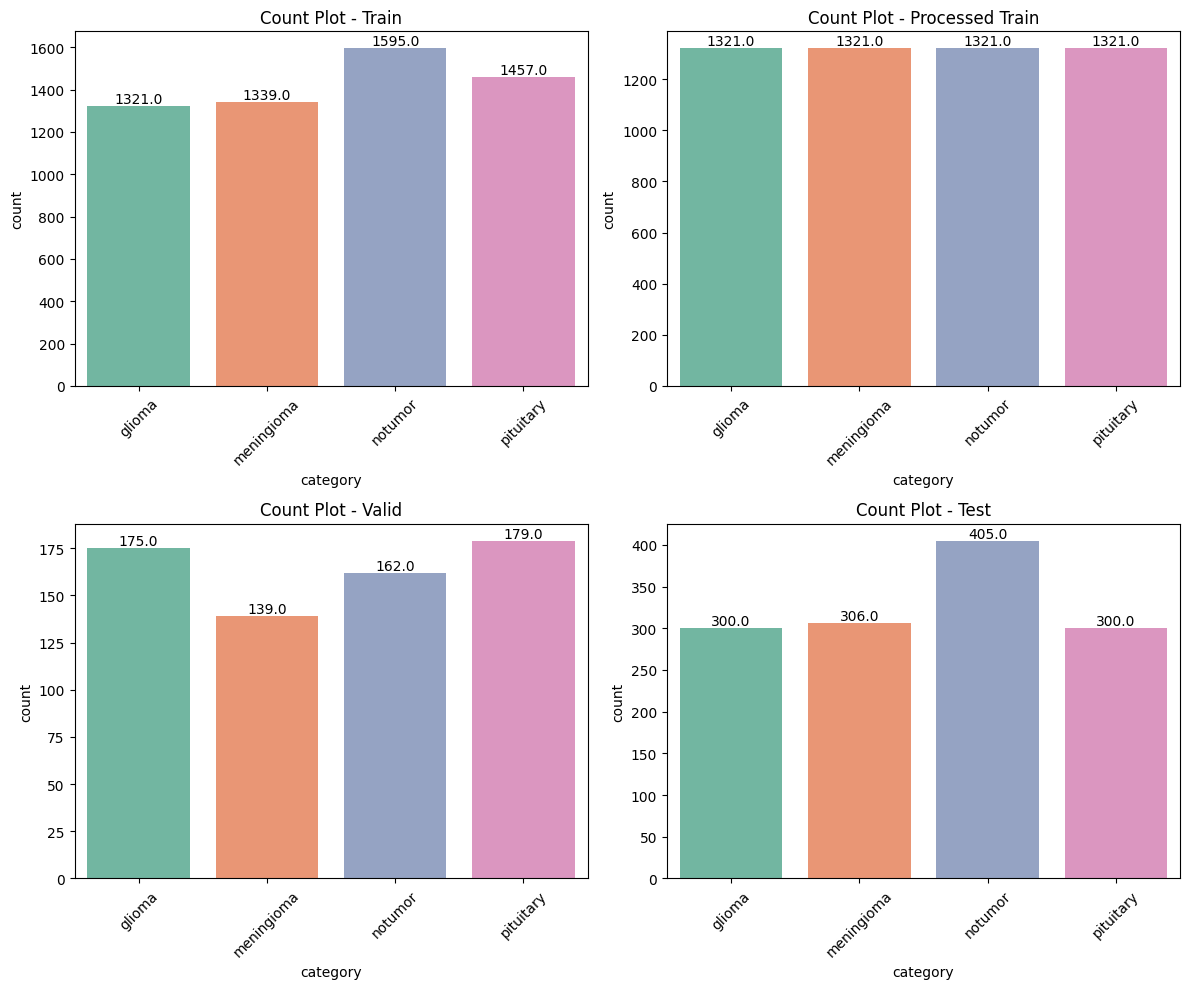

In [160]:

CATEGORIES =["glioma", "meningioma", "notumor", "pituitary"]
# Define a function to create subplots with count plots for different categories
def plot_countplots(train, processed_train, valid, test, categories):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 subplot layout

    datasets = [train, processed_train, valid, test]
    dataset_names = ['Train', 'Processed Train', 'Valid', 'Test']

    for i, ax in enumerate(axes.flatten()):
        sns.countplot(data=datasets[i], x='category', ax=ax, palette= "Set2")
        ax.set_title(f'Count Plot - {dataset_names[i]}')
        ax.set_xticklabels(categories, rotation=45)  # Set category names on x-axis
        
        # Add annotations (counts) on top of each bar
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.tight_layout()  # Adjust layout for better presentation
    plt.show()

plot_countplots(trainset, training, validing, testing, CATEGORIES)


<h2> 🎃 Image Visualization</h2>


In [18]:
def read_img(filepath, size):
    img = image.load_img(filepath, target_size=size)
    img = image.img_to_array(img)
    return img


**📌About Code:**

`grid= ImageGrid(fig, 111, nrows_ncols=(4,4), axes_pad=0.05):` Creates a grid layout of subplots (4 rows, 4 columns) within the figure with padding between axes set to 0.05.

`for category_id, category in enumerate(CATEGORIES)::` Loops through each category in the list CATEGORIES using its index (category_id) and value (category).

`for filepath in training[training['category']== category]['file'].values[:NUM_OF_CATEGORIES]::` Loops through a subset of image file paths for the current category (limited by NUM_OF_CATEGORIES) in the training dataset.

`ax = grid[i]:` Gets the current subplot (ax) from the grid using the index i.

`img = read_img(filepath, (WIDTH,HEIGHT)):` Reads and loads the image using a function read_img() (not shown) with specified width and height.

`ax.imshow(img/255.0):` Displays the image on the current subplot (ax) after normalizing pixel values to the range [0,1].

`ax.axis('on'):` Turns on the axes for the subplot.

`if i%NUM_OF_CATEGORIES == NUM_OF_CATEGORIES - 1::` Checks if the current subplot is the last subplot in a row.

`ax.text(250, 112, filepath.split('/')[-2], verticalalignment ='center'):` Adds text to the subplot indicating the category label based on the filepath split.

`i+=1:` Increments the counter variable i to move to the next subplot in the grid.


<h3> ⛳Training Image Data </h3>

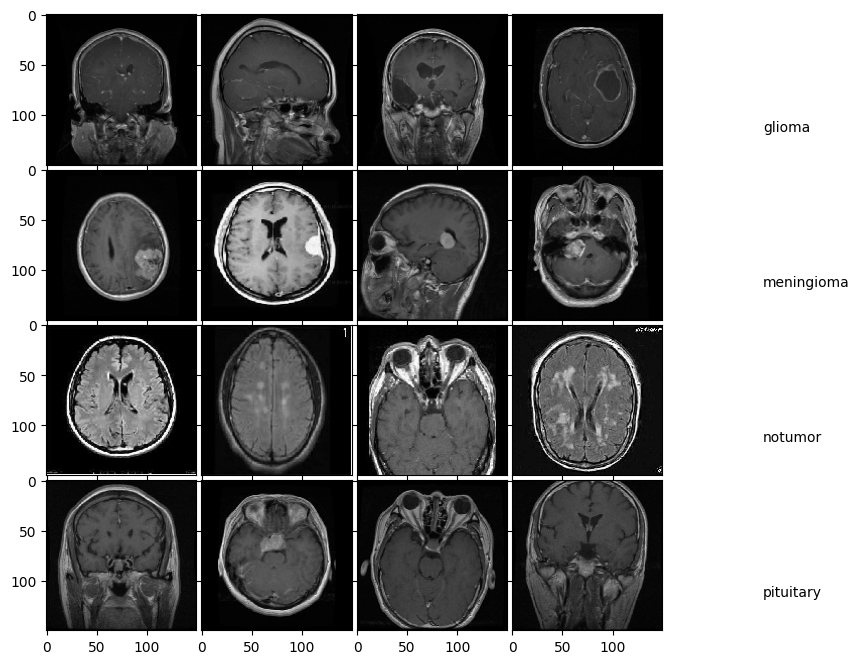

In [19]:

fig = plt.figure(1, figsize=(8, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.05)
i = 0

for category_id, category in enumerate(CATEGORIES):
    for filepath in training[training['category'] == category]['file'].values[:NUM_OF_CATEGORIES]:
        ax = grid[i]
        img = read_img(filepath, (WIDTH, HEIGHT))
        ax.imshow(img / 255.0)
        ax.axis('on')
        if i % NUM_OF_CATEGORIES == NUM_OF_CATEGORIES - 1:
            ax.text(250, 112, filepath.split('/')[-2], verticalalignment='center')
        i += 1

plt.show()

<h3> ⛳ Testing Image Data </h3>

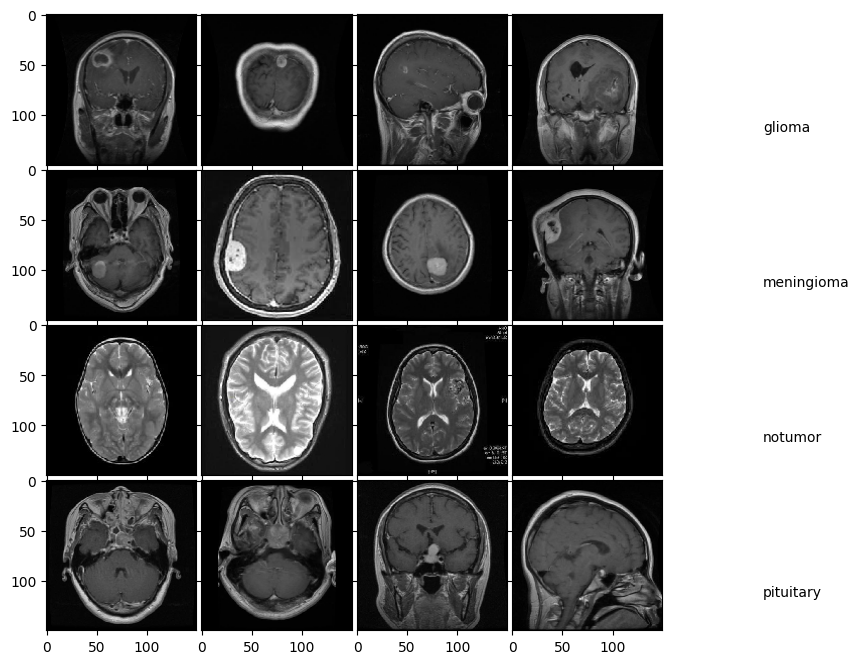

In [20]:
fig = plt.figure(1, figsize=(8,8))
#use of mpl ImageGrid toolkits for visualization
grid= ImageGrid(fig, 111, nrows_ncols=(4,4), axes_pad=0.05)
i=0
for category_id, category in enumerate(CATEGORIES):
    for filepath in testing[testing['category']== category]['file'].values[:NUM_OF_CATEGORIES]:
        ax = grid[i]
        img = read_img(filepath, (WIDTH,HEIGHT))
        ax.imshow(img/255.0)
        ax.axis('on')
        if i%NUM_OF_CATEGORIES == NUM_OF_CATEGORIES - 1:
            ax.text(250, 112, filepath.split('/')[-2], verticalalignment ='center')
        i+=1
    
plt.show() 

<h3> ⛳ Validating Image Data </h3>

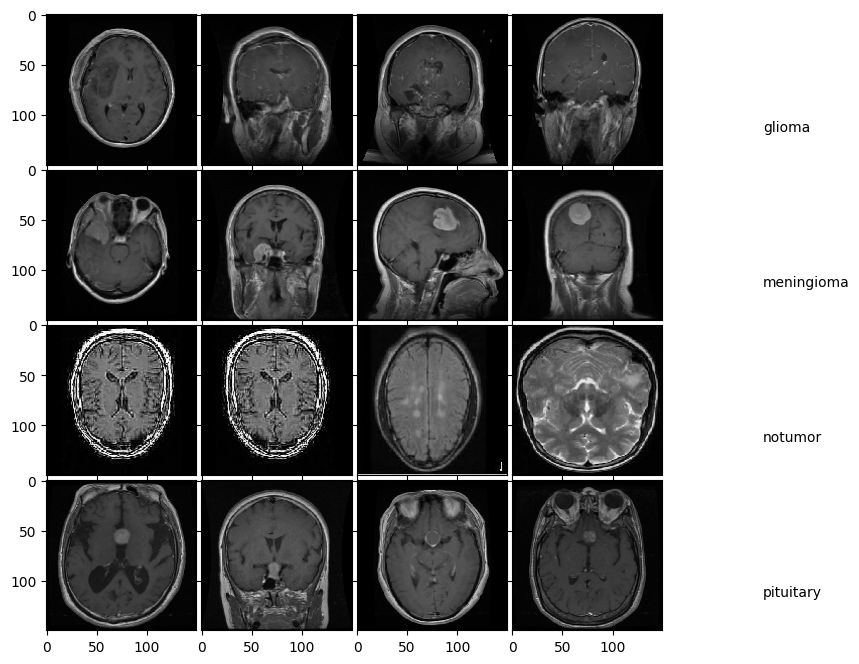

In [21]:
fig = plt.figure(1, figsize=(8,8))
#use of mpl ImageGrid toolkits for visualization
grid= ImageGrid(fig, 111, nrows_ncols=(4,4), axes_pad=0.05)
i=0
for category_id, category in enumerate(CATEGORIES):
    for filepath in validing[validing['category']== category]['file'].values[:NUM_OF_CATEGORIES]:
        ax = grid[i]
        img = read_img(filepath, (WIDTH,HEIGHT))
        ax.imshow(img/255.0)
        ax.axis('on')
        if i%NUM_OF_CATEGORIES == NUM_OF_CATEGORIES - 1:
            ax.text(250, 112, filepath.split('/')[-2], verticalalignment ='center')
        i+=1
    
plt.show() 

# 🏄 IMAGE DATA GENERATION FOR AUGMENTATION

**Image data augmentation** diversifies and expands **training datasets**, enhancing model performance by mitigating overfitting and improving generalization. By exposing models to various image alterations like **rotations, flips, and brightness changes**, it cultivates robustness to real-world scenarios. This technique helps balance class distributions and **trains models** to better handle diverse environmental factors, contributing to more reliable and effective predictions in **computer vision** tasks.

### 📒 IMAGE Augmentation Sample

This sample demonstrates how augmentation techniques can modify the original image to create variations used for training machine learning models.

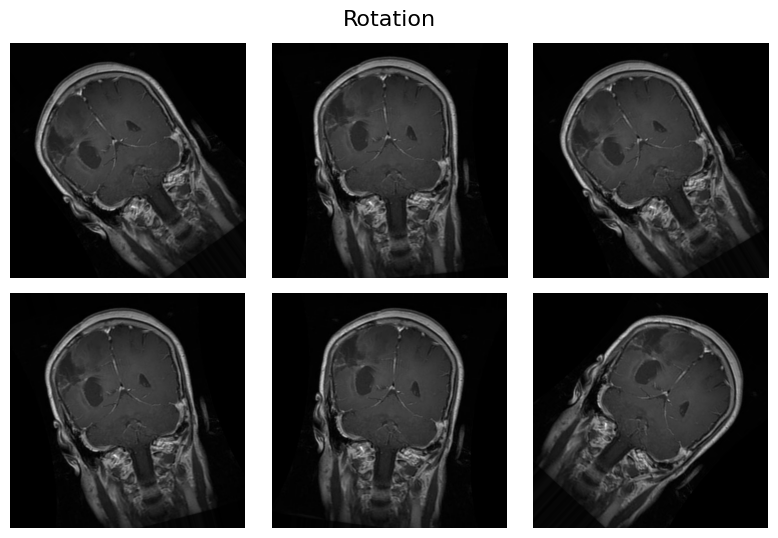

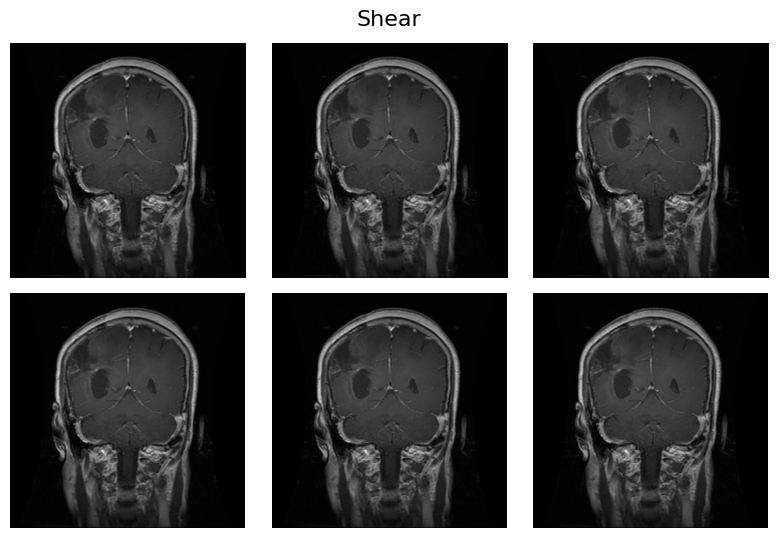

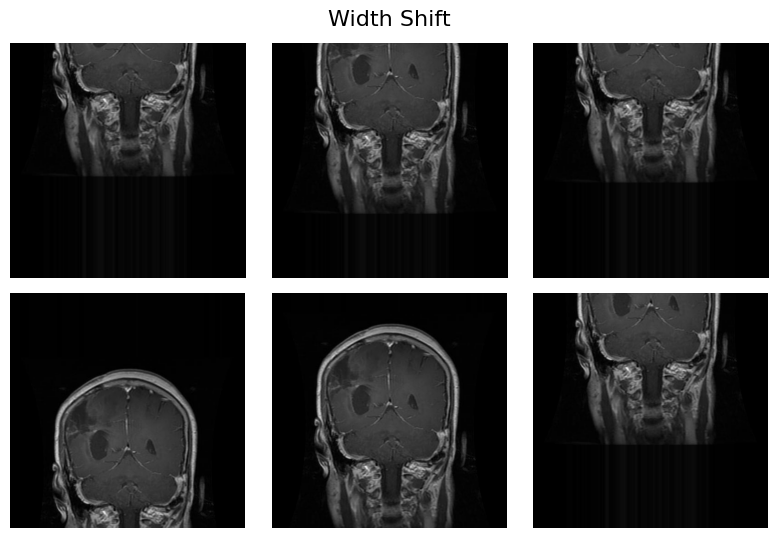

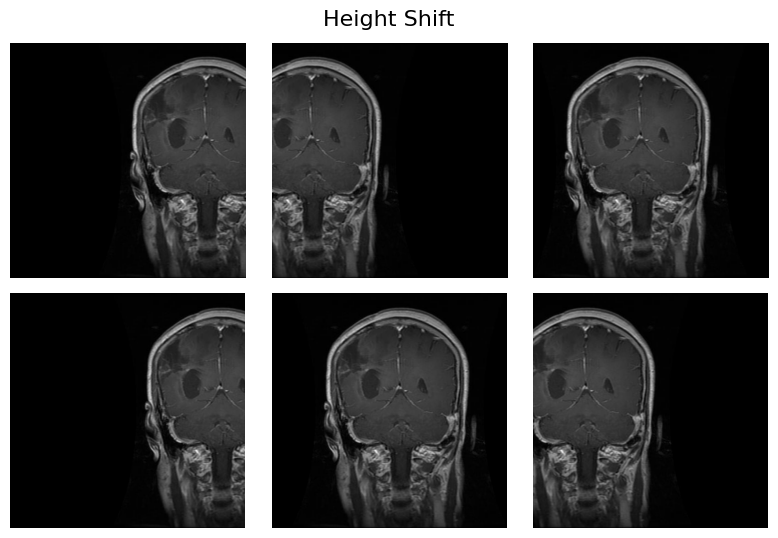

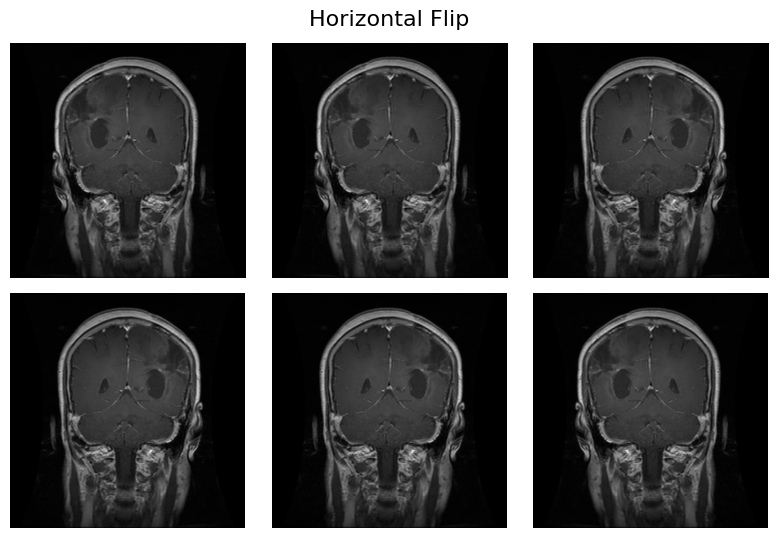

In [22]:

# Path to the image you want to augment
image_path = '/kaggle/input/mri-image-based-brain-tumor-classification/MRI Image Dataset for Brain Tumor/Training/glioma/Tr-gl_0010.jpg'  # Replace with the actual path to your image

# Load the image
img = load_img(image_path)
img_array = img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)  # Reshape to (1, height, width, channels)

# Define ImageDataGenerators with different augmentation settings
datagen_rotation = ImageDataGenerator(rotation_range=45)
datagen_width_shift = ImageDataGenerator(width_shift_range=0.6)
datagen_height_shift = ImageDataGenerator(height_shift_range=0.4)
datagen_shear = ImageDataGenerator(shear_range=2)
datagen_flip = ImageDataGenerator(horizontal_flip=True)

data_generators = [datagen_rotation, datagen_shear, datagen_width_shift, datagen_height_shift, datagen_flip]
attributes = ['Rotation', 'Shear', 'Width Shift', 'Height Shift',  'Horizontal Flip']

for i, datagen in enumerate(data_generators):
    augmented_images = []
    plt.figure(figsize=(8, 8))
    plt.suptitle(attributes[i], fontsize=16)
    
    generator = datagen.flow(img_array, batch_size=1)
    for j in range(6):
        batch = generator.next()
        augmented_images.append(batch[0].astype('uint8'))
        plt.subplot(3, 3, j + 1)
        plt.imshow(batch[0].astype('uint8'))
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

### 👾 Data Augmentation and Generation

In [23]:
def prepare_the_datasets(train_dataframe, valid_dataframe, x_columns, y_column, batch_size, image_size):  
    # Define parameters for ImageDataGenerator for train and validation
    train_image_data_generator = ImageDataGenerator(
        rescale=1./255,  # Rescale pixel values to [0,1]
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    val_image_data_generator = ImageDataGenerator(
        rescale=1./255  # Rescale pixel values to [0,1]
    )

    # Create image data generators for train and validation
    train_generator = train_image_data_generator.flow_from_dataframe(
        batch_size=batch_size,
        dataframe=train_dataframe,
        shuffle=True,
        x_col=x_columns,
        y_col=y_column,
        target_size=(image_size, image_size),  # Set the target size for images
        class_mode='categorical'  # For categorical labels
    )

    val_generator = val_image_data_generator.flow_from_dataframe(
        batch_size=batch_size,
        dataframe=valid_dataframe,
        shuffle=True,
        x_col=x_columns,
        y_col=y_column,
        target_size=(image_size, image_size),  # Set the target size for images
        class_mode='categorical'  # For categorical labels
    )
    return train_generator, val_generator

In [24]:
train_dataframe = training
valid_dataframe = testing
x_columns = 'file'
y_column = 'category'
batch_size = 64
image_size = 224

train_data_gen, validation_data_gen = prepare_the_datasets(train_dataframe, valid_dataframe, x_columns, y_column, batch_size, image_size)

Found 5284 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


# 😼 BUILD MODEL WITH VGG19

In [25]:
model_vgg_19 = tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

574710816/574710816 [==============================] - 18s 0us/step


**📌note:** 

1. Freezing the convolutional layers in a pre-trained model like VGG19 prevents them from being updated during training.
2. Freezing can restrict the model's ability to fine-tune lower layers, which might be beneficial for some tasks or datasets with similar features.

In [26]:
# Freeze the convolutional layers to prevent them from being trained
for layer in model_vgg_19.layers:
    layer.trainable = True

**📌note: Some Basic of Neural Network**

`Flatten:` Converts multidimensional data into a flat, 1D array for fully connected layers.

`Dense:` Fully connected layer where each neuron connects to every neuron in the previous layer.

`BatchNormalization:` Normalizes layer inputs, aiding faster training by reducing internal covariate shift.

`Dropout:` During training, randomly deactivates neurons to prevent overfitting.

`No Dropout in Output Layer:` Dropout is typically omitted in the output layer to avoid interference with final predictions.

`Dropout Range:` Typically, dropout rates range between 0.1 to 0.5, where 0.5 means dropping half the neurons during training. Optimal rates vary by dataset and architecture.

In [27]:
x = model_vgg_19.output
#make the input of VGG19 model in higher dimension to single dimension
#x = Flatten()(x)
#fully connected layers
x = Dense(2028, activation='relu')(x)
#normalization
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(4, activation='softmax')(x) 

**📌note:** This code segment creates a classification model using VGG19 by flattening the higher-dimensional output, adding fully connected layers with ReLU activation, applying batch normalization, and using dropout for regularization, ultimately generating a softmax output with 4 categories.

In [28]:
#final model
model = Model(inputs = model_vgg_19.input, outputs = output)

**📌note:** This line constructs the final neural network model by specifying the input and output layers, creating an instance of the model with the defined architecture using the VGG19 backbone.

# 🌱 MODEL SUMMARY

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**📌note:** This information shows that the machine learning model has a total of about 147.8 million settings that it learns from the data. Among these, around 147.8 million settings are adjustable during training, taking up about 563.76 megabytes of space. The remaining 6,104 settings, taking up about 23.84 kilobytes, are fixed and not adjusted during training. 

# 🎯 PLOT MODEL

In [30]:
#pip install pydot

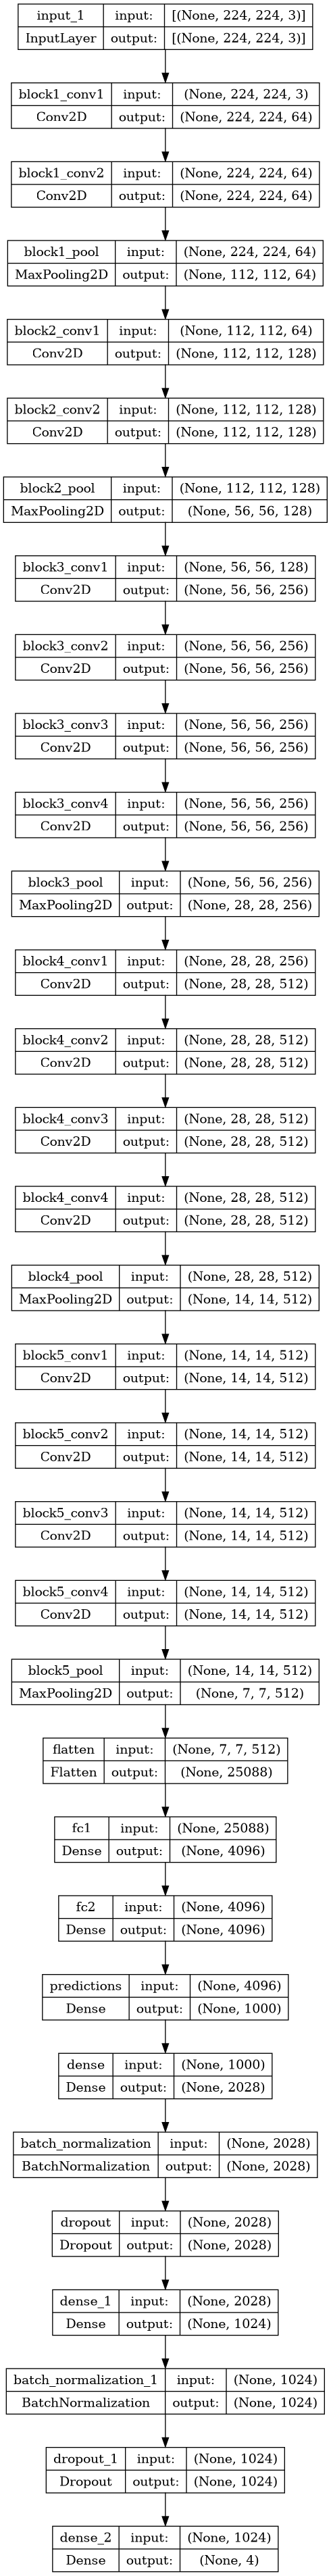

In [31]:
#from plot_model import plot_model
plot_model(model,to_file='model_vgg19.png', dpi=96, rankdir = 'TB', show_layer_names=True, show_shapes=True) 

# 🐥 MODEL COMPILE, TENSORBOARD, CHECKPOINT, REDUCE_LR

`Model Compile:` Configuration of a model with loss functions, optimizers, and metrics to prepare it for training.

`TensorBoard:` Visualization tool used to analyze and monitor machine learning models' performance through interactive graphs and summaries.

`Checkpoint:` Saving mechanism that captures the model's weights, allowing resuming training or loading the model for later use.

`Reduce_LR:` Technique to dynamically decrease the learning rate during training to facilitate convergence and prevent overshooting of the optimal solution.

In [32]:
#compile Model
model.compile(loss='categorical_crossentropy',
              optimizer =tf.keras.optimizers.Adam(learning_rate=5e-5),run_eagerly=True,
              metrics=["accuracy"])
    
#.h5 = Hierarchical Data Format Ver. 5 file, verbose =1, to see execution
tensorboard= TensorBoard(log_dir="logs")
checkpoint= ModelCheckpoint("vgg19_model.h5",
                           monitor="val_accuracy", verbose=1,
                           mode="auto", save_best_only=True)
#monitor: quantity to be monitored.     
#factor: factor by which the learning rate will be reduced. 
#patience: number of epochs with no improvement after which learning rate will be reduced.     
#verbose: int. 0: quiet, 1: update messages.
#min_delta: early stopping of epochs
#cooldown: number of epochs to wait before resuming normal operation after
reduce_lr=ReduceLROnPlateau(monitor="val_accuracy",
                           factor=0.3,
                           patience=2,verbose=1,
                           mode="auto") #lr dropping difference

# 🌌 MODEL TRAINING

In [33]:
# Calculate steps per epoch and validation steps
#train_steps = len(train_data_gen) // batch_size
#validation_steps = len(validation_data_gen) // batch_size
epochs = 30

history = model.fit(train_data_gen,
                    epochs=epochs,
                    validation_data=validation_data_gen,
                    callbacks=[tensorboard, checkpoint, reduce_lr]
                    )

Epoch 1/30
83/83 [==============================] - ETA: 0s - loss: 0.7691 - accuracy: 0.6715
Epoch 1: val_accuracy improved from -inf to 0.30892, saving model to vgg19_model.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


83/83 [==============================] - 132s 1s/step - loss: 0.7691 - accuracy: 0.6715 - val_loss: 1.3723 - val_accuracy: 0.3089 - lr: 5.0000e-05
Epoch 2/30
83/83 [==============================] - ETA: 0s - loss: 0.3633 - accuracy: 0.8749
Epoch 2: val_accuracy improved from 0.30892 to 0.35698, saving model to vgg19_model.h5
83/83 [==============================] - 88s 1s/step - loss: 0.3633 - accuracy: 0.8749 - val_loss: 1.3565 - val_accuracy: 0.3570 - lr: 5.0000e-05
Epoch 3/30
83/83 [==============================] - ETA: 0s - loss: 0.2607 - accuracy: 0.9116
Epoch 3: val_accuracy did not improve from 0.35698
83/83 [==============================] - 81s 969ms/step - loss: 0.2607 - accuracy: 0.9116 - val_loss: 1.2673 - val_accuracy: 0.3021 - lr: 5.0000e-05
Epoch 4/30
83/83 [==============================] - ETA: 0s - loss: 0.1801 - accuracy: 0.9408
Epoch 4: val_accuracy improved from 0.35698 to 0.64531, saving model to vgg19_model.h5
83/83 [==============================] - 86s 1s/ste

# 👻 MODEL EVALUATION

In [39]:
train_score= model.evaluate(train_data_gen)
print("\nWe have training loss {:.3f}% and training accuracy {:.3f}% after evaluation."
      .format(train_score[0], train_score[1]*100))

83/83 [==============================] - 70s 841ms/step - loss: 0.0041 - accuracy: 0.9991

We have training loss 0.004% and training accuracy 99.905% after evaluation.


**📌We have training loss 0.004% and training accuracy 99.905% after evaluation.**

In [45]:
val_score= model.evaluate(validation_data_gen)
print("\nWe have validation loss {:.3f} and validation accuracy {:.3f}% after evaluation."
      .format(val_score[0], val_score[1]*100))

21/21 [==============================] - 5s 219ms/step - loss: 0.0350 - accuracy: 0.9931

We have validation loss 0.035 and validation accuracy 99.314% after evaluation.


**📌We have validation loss 0.035 and validation accuracy 99.314% after evaluation.**

# 🍧 ACCURACY, LEARNING RATE AND LOSS PLOT

In [43]:
def accuracy_lr_loss_plot():
    fig = plt.figure(figsize=(15,6))
    
    plt.subplot(131)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'go--', label = "val_accuracy")
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("No of Epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(132)
    plt.plot(history.history['lr'], 'bo--', label = 'learning Rate')
    plt.title("Learning Rate Measurements")
    plt.xlabel("No of Epochs")
    plt.ylabel("Learning Rate")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(133)
    plt.plot(history.history['loss'], 'bo--', label = 'loss')
    plt.plot(history.history['val_loss'], 'ro--', label = 'val_loss')
    plt.title("Training Data Loss Measurements")
    plt.xlabel("No of Epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()

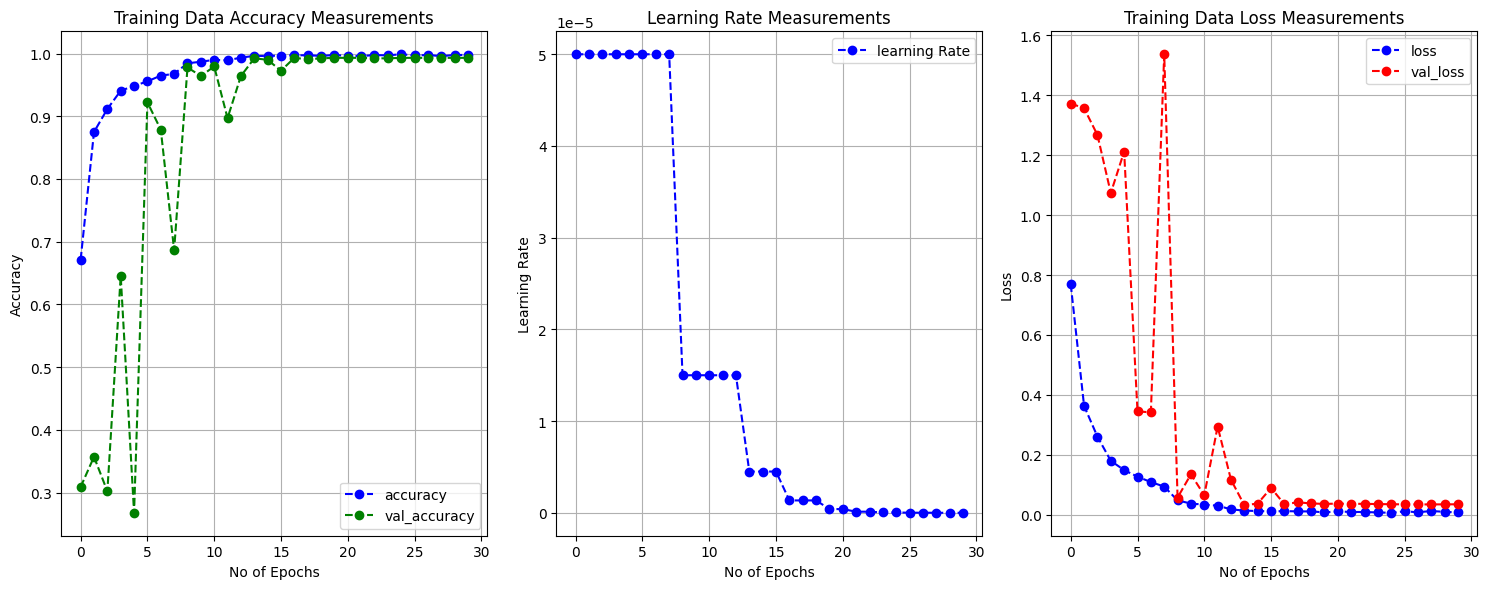

In [44]:
accuracy_lr_loss_plot()

# 😲 MODEL PREDICTION WITH VALIDATION(UNSEEN DATA)

In [51]:
def prepare_test_data(test_dataframe, x_columns, batch_size, image_size):  
    # Define parameters for ImageDataGenerator for train and validation

    test_image_data_generator = ImageDataGenerator(
        rescale=1./255  # Rescale pixel values to [0,1]
    )
    
    test_generator = test_image_data_generator.flow_from_dataframe(
        batch_size=batch_size,
        dataframe=test_dataframe,
        shuffle=False,
        x_col=x_columns,
        y_col=None,
        target_size=(image_size, image_size),  # Set the target size for images
        class_mode=None  # For categorical labels
    )
    return test_generator

In [141]:
#testing columns details
testing.columns

Index(['file', 'category_id', 'category'], dtype='object')

In [143]:
#test images preprocessing
test_processed_images = prepare_test_data(validing,'file', 32, 224)

Found 655 validated image filenames.


In [144]:
# Make predictions for images using the model
predictions = model.predict(test_processed_images, steps=len(testing) // 32 + 1)

41/41 [==============================] - 5s 126ms/step


In [145]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,

In [157]:
#validing dataset to create new dataframe
target_and_predict = validing.copy()

In [158]:
#add column for predicted value
target_and_predict['predicted_classes'] = predicted_classes

In [159]:
#target_and_predict dataframe
target_and_predict

,file,category_id,category,predicted_classes
0,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma,0
1,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma,0
2,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma,0
3,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma,0
4,/kaggle/input/mri-image-based-brain-tumor-clas...,0,glioma,0
...,...,...,...,...
650,/kaggle/input/mri-image-based-brain-tumor-clas...,3,pituitary,3
651,/kaggle/input/mri-image-based-brain-tumor-clas...,3,pituitary,3
652,/kaggle/input/mri-image-based-brain-tumor-clas...,3,pituitary,3
653,/kaggle/input/mri-image-based-brain-tumor-clas...,3,pituitary,3


# 😃 TESTING ACCURACY

In [149]:
# Calculate accuracy
accuracy = accuracy_score(target_and_predict['category_id'], target_and_predict['predicted_classes'])

print(f"\nWe have test accuracy {accuracy * 100:.4f}% after test images evaluation.")


We have test accuracy 99.6947% after test images evaluation.


**📌We have test accuracy 99.6947% after test images evaluation.**

# 🏣 AUC and ROC CURVE

The code generates an ROC curve for unique classes by:

* Extracting unique classes present in both true labels and predicted classes.
* Binarizing labels and predictions for these unique classes.
* Computing False Positive Rate (FPR) and True Positive Rate (TPR) for each class.
* Plotting the ROC curve for each unique class, displaying class-specific areas under the curve (AUC) in a single plot.


In [177]:
# find the column with unique values
unique_values = target_and_predict['category_id'].unique()

result = target_and_predict.groupby('category_id').first()
result

,file,category,predicted_classes
category_id,,,
0,/kaggle/input/mri-image-based-brain-tumor-clas...,glioma,0
1,/kaggle/input/mri-image-based-brain-tumor-clas...,meningioma,1
2,/kaggle/input/mri-image-based-brain-tumor-clas...,notumor,2
3,/kaggle/input/mri-image-based-brain-tumor-clas...,pituitary,3


In [179]:
result['category']

category_id
0        glioma
1    meningioma
2       notumor
3     pituitary
Name: category, dtype: object

++++++++++++++++++++ AUC and ROC Details ++++++++++++++++++++++++
Create ROC CURVE for Unique Classes


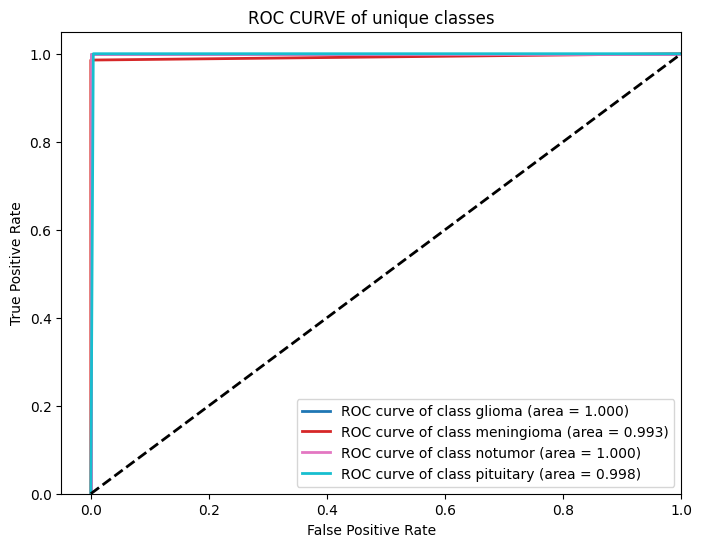

In [188]:
#class_names = target_and_predict['category']
class_names = result['category']
true_labels = target_and_predict['category_id']
predicted_classes_int = target_and_predict['predicted_classes']

def auc_roc_curve():
    print("++++++++++++++++++++ AUC and ROC Details ++++++++++++++++++++++++")
    #unique_classes = np.unique(np.concatenate((true_labels, predicted_classes_int), axis=None))

    y_test_bin = label_binarize(true_labels, classes=class_names)
    y_pred_bin = label_binarize(predicted_classes_int, classes=class_names)

    n_classes = len(class_names)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    print("=================================================================")
    print("Create ROC CURVE for Unique Classes")

    lw = 2
    plt.figure(figsize=(8, 6))
    colors = plt.cm.get_cmap('tab10', n_classes)
    for i, color, j, in zip(range(n_classes), colors(np.arange(n_classes)), class_names):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {} (area = {:.3f})'.format(j, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE of unique classes')
    plt.legend(loc="lower right")
    plt.show()

auc_roc_curve()

# 😖 CONFUSION MATRIX DISPLAY


This code snippet achieves the following:

* Mapping Creation: Constructs a dictionary mapping category IDs to their corresponding names from the DataFrame.
* Replacement: Converts numeric values in 'category_id' and 'predicted_classes' columns to their respective names using the mapping dictionary.
* Report Generation: Utilizes the modified DataFrame to generate a classification report, replacing numeric values with category names, demonstrating the classification performance.

In [180]:
# Replace these with your actual column names
category_id_column = 'category_id'
predicted_classes_column = 'predicted_classes'
category_name_column = 'category'

# Create a mapping dictionary from category_id to category_name
id_to_name_mapping = dict(zip(target_and_predict[category_id_column], target_and_predict[category_name_column]))
print(f"id_to_name_mapping:\n{id_to_name_mapping}")
# Replace numeric values in 'category_id' and 'predicted_classes' columns with their names
target_and_predict['category_id'] = target_and_predict['category_id'].map(id_to_name_mapping)
target_and_predict['predicted_classes'] = target_and_predict['predicted_classes'].map(id_to_name_mapping)

# Generate classification report with names instead of numeric values
report = classification_report(
    target_and_predict['category_id'],
    target_and_predict['predicted_classes']
)

print(report)

id_to_name_mapping:
{0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}
              precision    recall  f1-score   support

      glioma       1.00      1.00      1.00       175
  meningioma       1.00      0.99      0.99       139
     notumor       1.00      1.00      1.00       162
   pituitary       0.99      1.00      0.99       179

    accuracy                           1.00       655
   macro avg       1.00      1.00      1.00       655
weighted avg       1.00      1.00      1.00       655



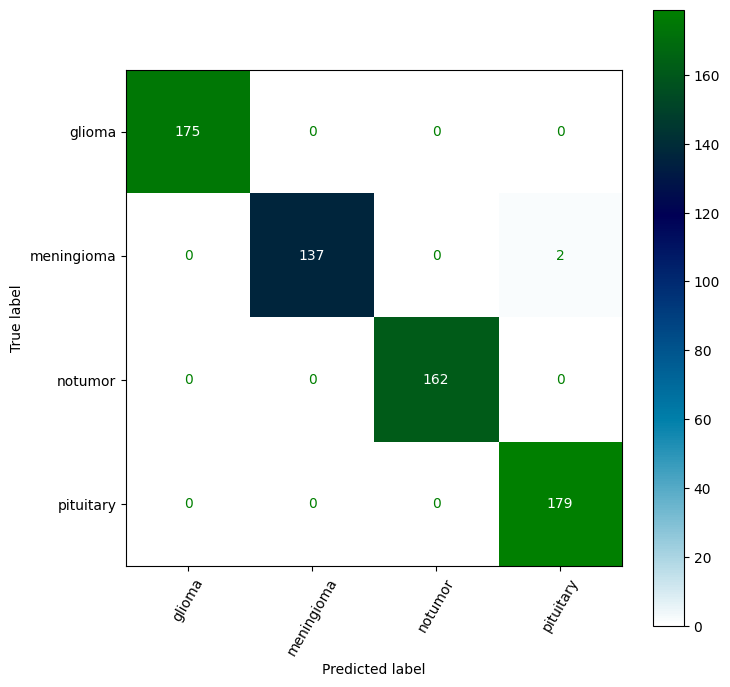

In [152]:
# Generate confusion matrix
conf_matrix = confusion_matrix(
    target_and_predict['category_id'],
    target_and_predict['predicted_classes']
)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list(id_to_name_mapping.values()))
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='ocean_r',ax=ax,xticks_rotation=60)
plt.show()


# 👿 MISCLASSIFIED IMAGES 

The provided code snippet performs the following:

* Data Selection: Extracts misclassified samples by comparing the 'category_id' and 'predicted_classes' columns.
* Visualization: Displays a grid of misclassified images along with their actual and predicted labels.
* Adjustable Display: Sets the number of misclassified images to exhibit in a 3x3 grid and showcases them with their respective labels using Matplotlib.

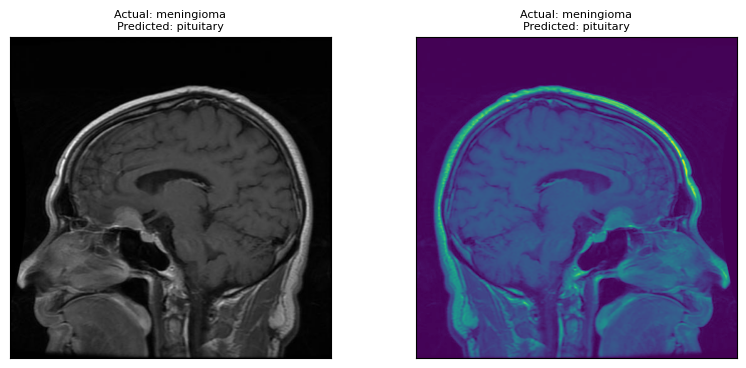

In [155]:
# Replace these with your actual column names
image_path_column = 'file'
category_id_column = 'category_id'
predicted_classes_column = 'predicted_classes'

# Filter misclassified samples from the DataFrame
misclassified = target_and_predict[target_and_predict[category_id_column] != target_and_predict[predicted_classes_column]]

# Load and display misclassified images with labels
num_images_to_display = len(misclassified)  # Number of misclassified images to display (adjust as needed)
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.1, hspace=0.4)

for i, (_, row) in enumerate(misclassified.head(num_images_to_display).iterrows()):
    img_path = row[image_path_column]
    actual_label = row[category_id_column]
    predicted_label = row[predicted_classes_column]

    img = Image.open(img_path)
    ax = plt.subplot(gs[i])
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Actual: {actual_label}\nPredicted: {predicted_label}', fontsize=8)

plt.tight_layout()
plt.show()

# 👽 MISCLASSIFIED IMAGE PATH


The provided code performs the following operations:

* Data Selection: Filters misclassified samples by comparing 'category_id' and 'predicted_classes' columns.
* Extraction: Retrieves a DataFrame containing misclassified samples with columns for image paths, actual categories, and predicted categories.
* Display: Prints a DataFrame displaying misclassified samples along with their respective image paths, actual categories, and predicted categories.

In [156]:
# Replace these with your actual column names
image_path_column = 'file'
category_id_column = 'category_id'
predicted_classes_column = 'predicted_classes'

# Filter misclassified samples and extract indices with corresponding image paths
misclassified_samples = target_and_predict[target_and_predict[category_id_column] != target_and_predict[predicted_classes_column]]
misclassified_indices_with_image_paths = misclassified_samples[[image_path_column, category_id_column, predicted_classes_column]]

print("Misclassified Samples with Image Paths:")
misclassified_indices_with_image_paths

Misclassified Samples with Image Paths:


,file,category_id,predicted_classes
300,/kaggle/input/mri-image-based-brain-tumor-clas...,meningioma,pituitary
311,/kaggle/input/mri-image-based-brain-tumor-clas...,meningioma,pituitary


# 😂 SUMMARY 


The model is based on the **VGG19 architecture pre-trained on ImageNet**, with additional dense layers fine-tuned for a specific task. With a remarkable **training accuracy of 99.905%** and a negligible training loss of **0.004%**, the model exhibits a high capacity to learn intricate patterns within the training data. During **validation**, the model achieves an accuracy of **99.314%** and low loss of **0.035**.

Upon evaluating the model's performance on **test images**, it achieves an **accuracy of 99.6947%**, showcasing its reliability and consistency across new, **unseen data**. The addition of dense layers, batch normalization, and dropout mechanisms further enhances the model's capability to generalize and avoid overfitting.

🎉 Overall, the model demonstrates performance across training, validation, and test datasets, showcasing its high accuracy and minimal loss. However, future improvements could involve exploring different architectures or hyperparameter tuning to potentially extract more intricate features or improve computational efficiency, aiming for even greater performance.



**"Thrilled to share the incredible performance of my model! With a staggering accuracy of [99.6947%], it showcases exceptional learning prowess. 🚀 Curious minds, what do you think? Your insights could fuel its journey to even greater heights! #AI #MachineLearning #FeedbackWelcome" 🌟✨**